In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass


#### Image 0 - dicom_00023075_033.dcm

mean 123.25588417053223
std 57.47256019573093

#### Image 1 - dicom_00029579_005.dcm

mean 101.89211559295654
std 41.324323968457335

#### Image 2 - dicom_00013659_019.dcm

mean 155.60211944580078
std 43.776203799182035


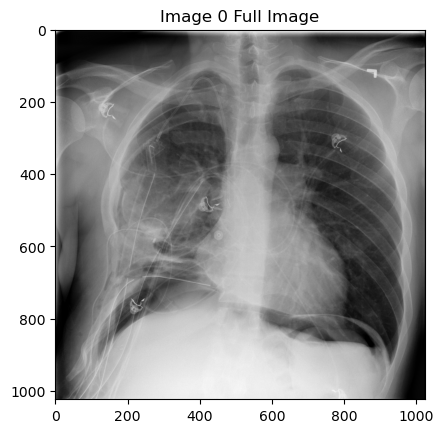

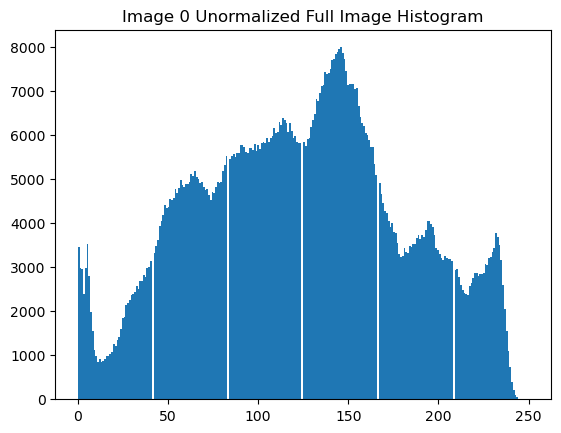

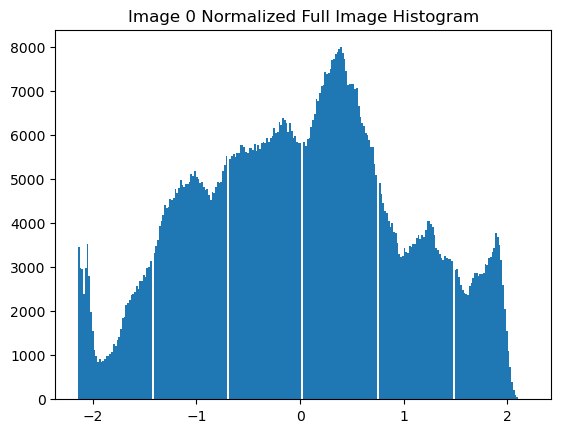

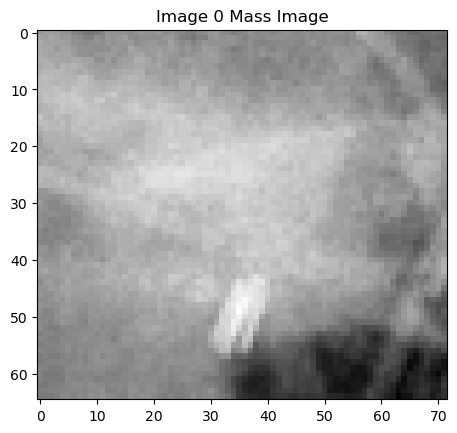

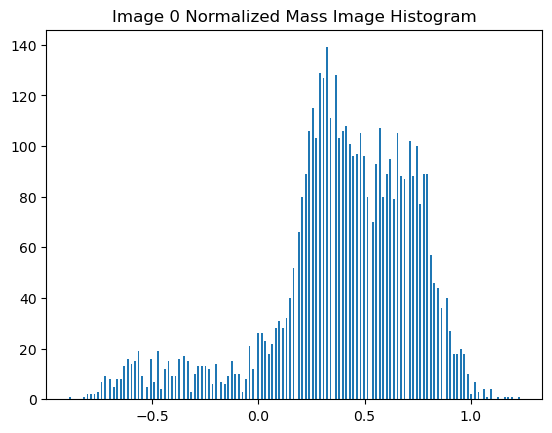

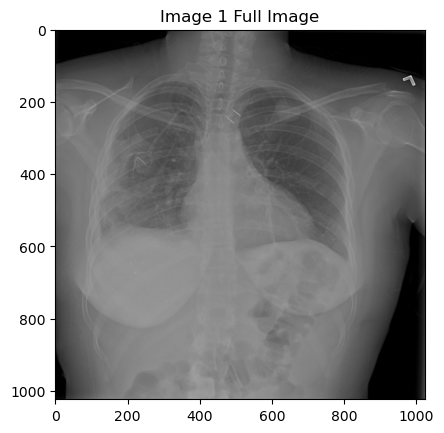

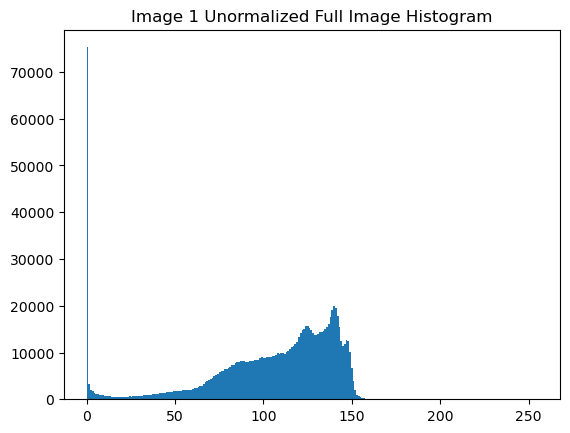

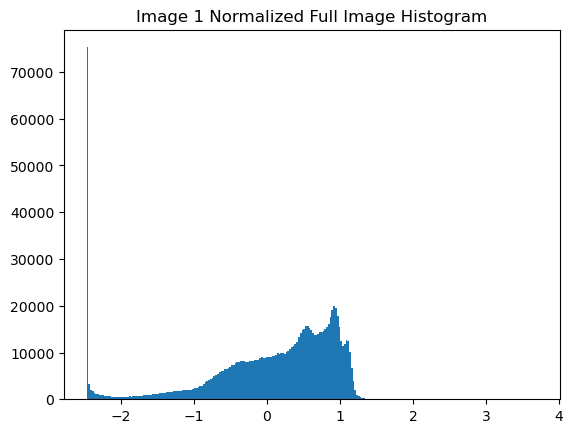

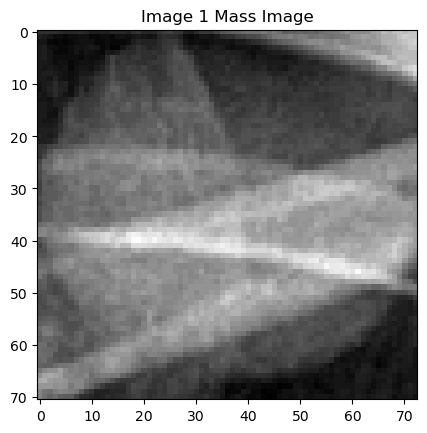

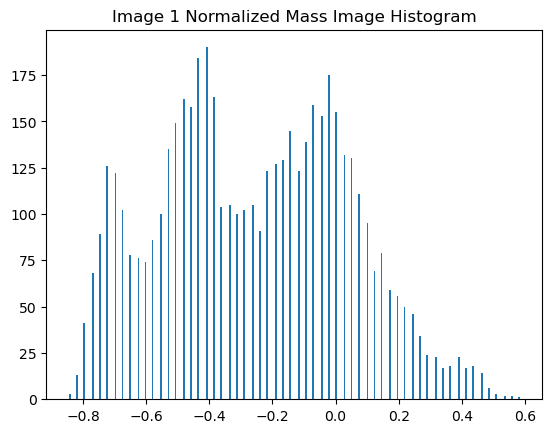

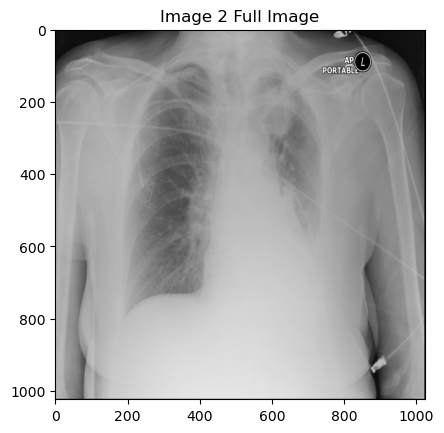

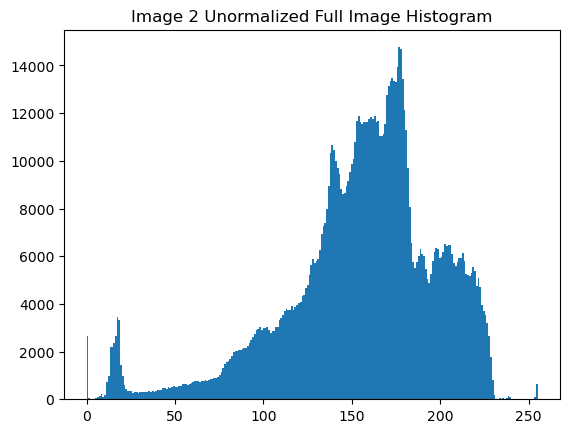

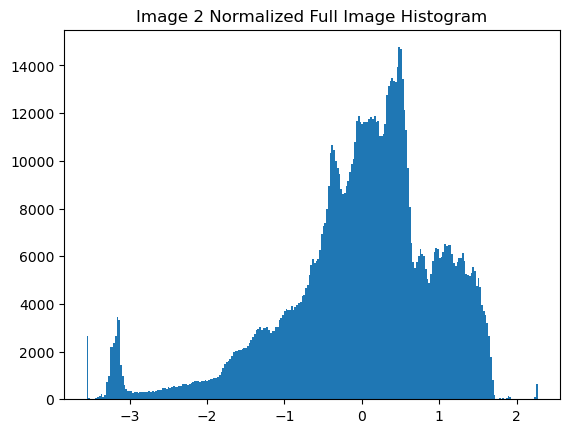

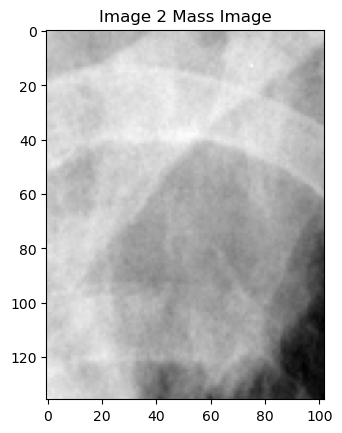

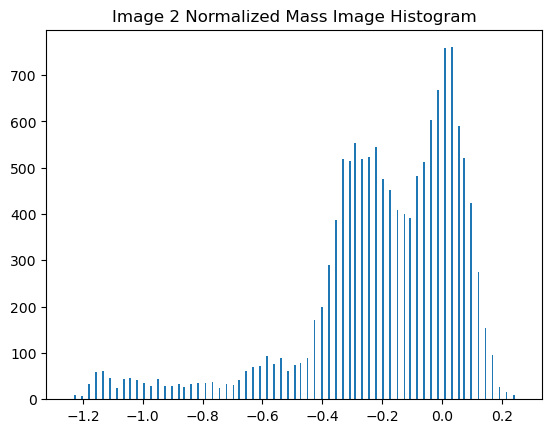

In [3]:
for img_idx in [0,1,2]:
    print(f"\n#### Image {img_idx} - {bbox['Image Index'][img_idx]}\n")
    dcm = pydicom.dcmread(bbox['Image Index'][img_idx])

    # plot full image
    plt.figure()
    plt.title(f"Image {img_idx} Full Image")
    plt.imshow(dcm.pixel_array, cmap='gray');

    # Plot histogram of full image
    plt.figure()
    plt.title(f"Image {img_idx} Unormalized Full Image Histogram")
    plt.hist(dcm.pixel_array.ravel(), bins=256);

    # Normalize image
    mean = np.mean(dcm.pixel_array)
    std = np.std(dcm.pixel_array)
    print('mean', mean)
    print('std', std)   
    pixel_data_normalized = (dcm.pixel_array - mean)/std

    # plot histogram of normalized full image
    plt.figure()
    plt.title(f"Image {img_idx} Normalized Full Image Histogram")
    plt.hist(pixel_data_normalized.ravel(), bins=256);

    # Get mass
    x = int(bbox['Bbox [x'][img_idx])
    y = int(bbox['y'][img_idx])
    w = int(bbox['w'][img_idx])
    h = int(bbox['h]'][img_idx])
    mass_normalized = pixel_data_normalized[y:y+h, x:x+w]

    # Plot mass image
    plt.figure()
    plt.title(f"Image {img_idx} Mass Image")
    plt.imshow(mass_normalized, cmap='gray');

    # Plot normalized histogram of the mass
    plt.figure()
    plt.title(f"Image {img_idx} Normalized Mass Image Histogram")
    plt.hist(mass_normalized.ravel(), bins=256);